In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("25-iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.drop('Id', axis = 1, inplace=True)

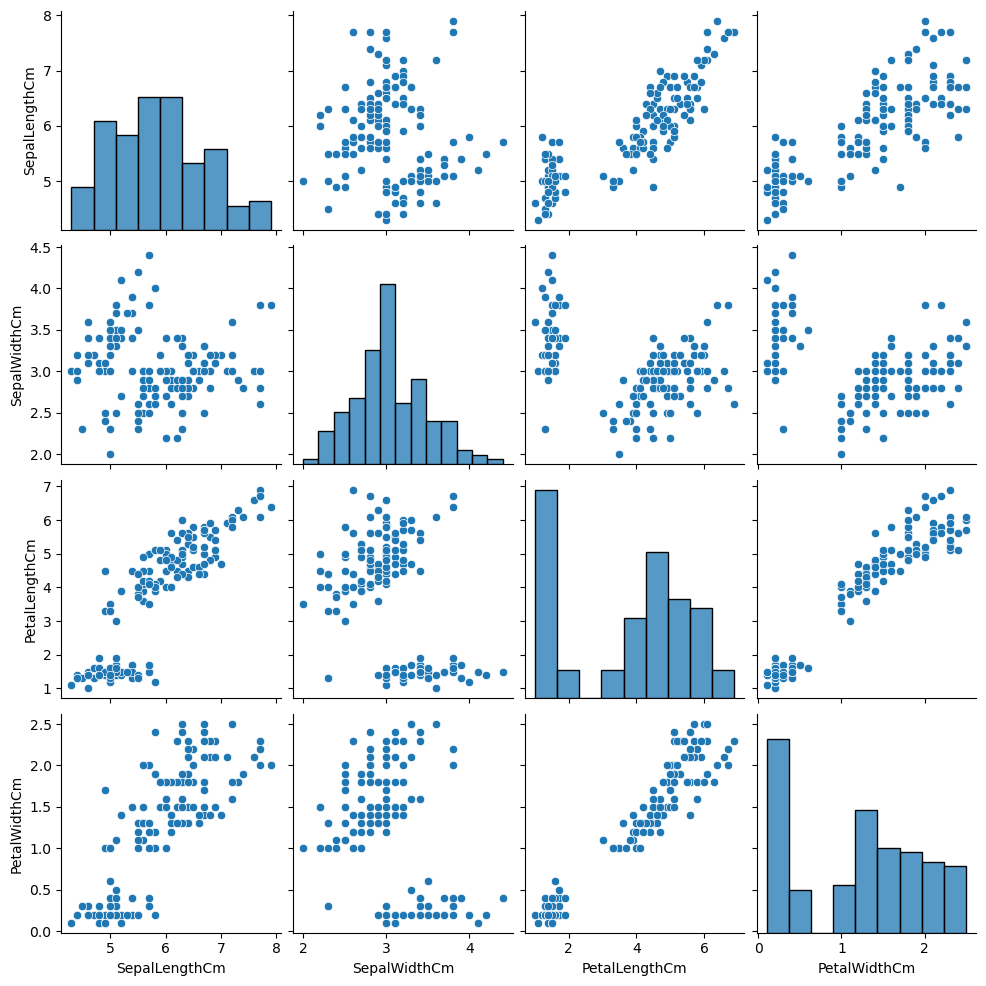

In [8]:
sns.pairplot(df)
plt.show()

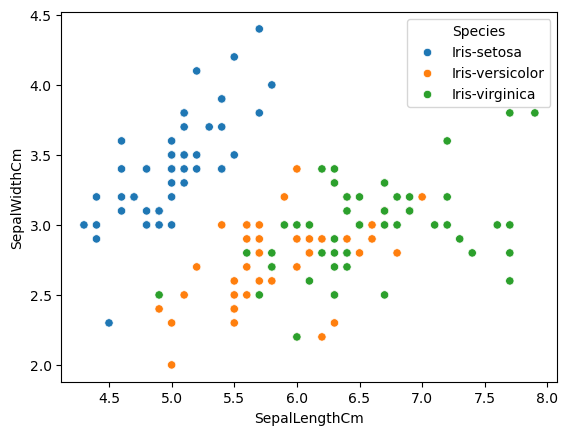

In [9]:
sns.scatterplot(x=df.SepalLengthCm, y=df.SepalWidthCm, hue=df.Species)
plt.show()

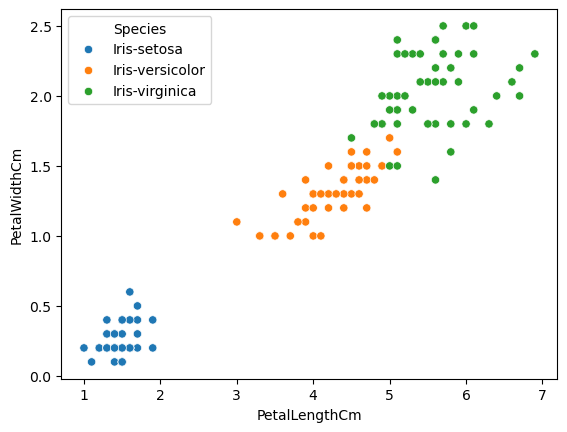

In [10]:
sns.scatterplot(x=df.PetalLengthCm, y=df.PetalWidthCm, hue=df.Species)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelEncoder = LabelEncoder()

In [13]:
df.Species = labelEncoder.fit_transform(df.Species)

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- Burada encoding işlemini target değişkene uyguladığım için train - test split yapmadan encode etmemde sorun olmadı.

In [15]:
df.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

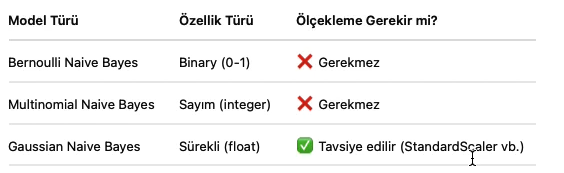

- Burada Gaussian Navie Bayes haricinde scaler yapmaya gerek yok. Biz de continuous olduğu için Gussian yapcaz.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Species', axis=1)
y = df.Species

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gauss = GaussianNB()

In [24]:
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [28]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [1000, 100, 10, 1, 0.1, 0.01],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'class_weight' : [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
}
cv = StratifiedKFold()

In [29]:
logisticGrid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', refit=True, cv=cv, n_jobs=-1, verbose=3)

In [30]:
logisticGrid.fit(X_train, y_train)
y_pred = logisticGrid.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Accuracy Score : 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  2 10]]


In [31]:
logisticGrid.best_params_

{'C': 100, 'class_weight': {0: 10, 1: 100}, 'penalty': 'l2', 'solver': 'sag'}

# Support Vector Classifier

In [32]:
from sklearn.svm import SVC

In [33]:
param_grid = {
    'C' : [1000, 100, 10, 1, 0.1, 0.01],
    'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree' : [3, 2, 1],
    'gamma' : ['scale', 'auto', 1000, 100, 10, 1, 0.01, 0.001]
}

In [34]:
svcGrid = GridSearchCV(estimator=SVC(), param_grid=param_grid, n_jobs=-1, refit=True, cv=cv, verbose=3, return_train_score=True)

In [35]:
svcGrid.fit(X_train, y_train)
y_pred = svcGrid.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Accuracy Score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [36]:
svcGrid.best_params_

{'C': 1000, 'degree': 3, 'gamma': 0.001, 'kernel': 'sigmoid'}